In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
AgeGroupDetails = pd.read_csv('AgeGroupDetails.csv')
Covid_19_india = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
HospitalBedsIndia = pd.read_csv('HospitalBedsIndia.csv')
ICMRTestingDetails = pd.read_csv('ICMRTestingDetails.csv',sep=r'\t', engine='python')
IndividualDetails = pd.read_csv('IndividualDetails.csv',parse_dates=['diagnosed_date'],dayfirst=True)
lab_data=pd.read_csv('ICMRTestingLabs.csv')
Population_india_census2011 = pd.read_csv('population_india_census2011.csv')

<h1>Question 1</h1>

In [51]:
AgeGroupDetails

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


From the <b> TotalCases </b> column, Age group <b>20-29</b> is most infected

<h1>Question 2</h1>

In [52]:
Covid_19_india.head()
#  The entries are already sorted by date

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [0]:
df = Covid_19_india.copy()
rows, cols = df.shape

In [54]:
df.isnull().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


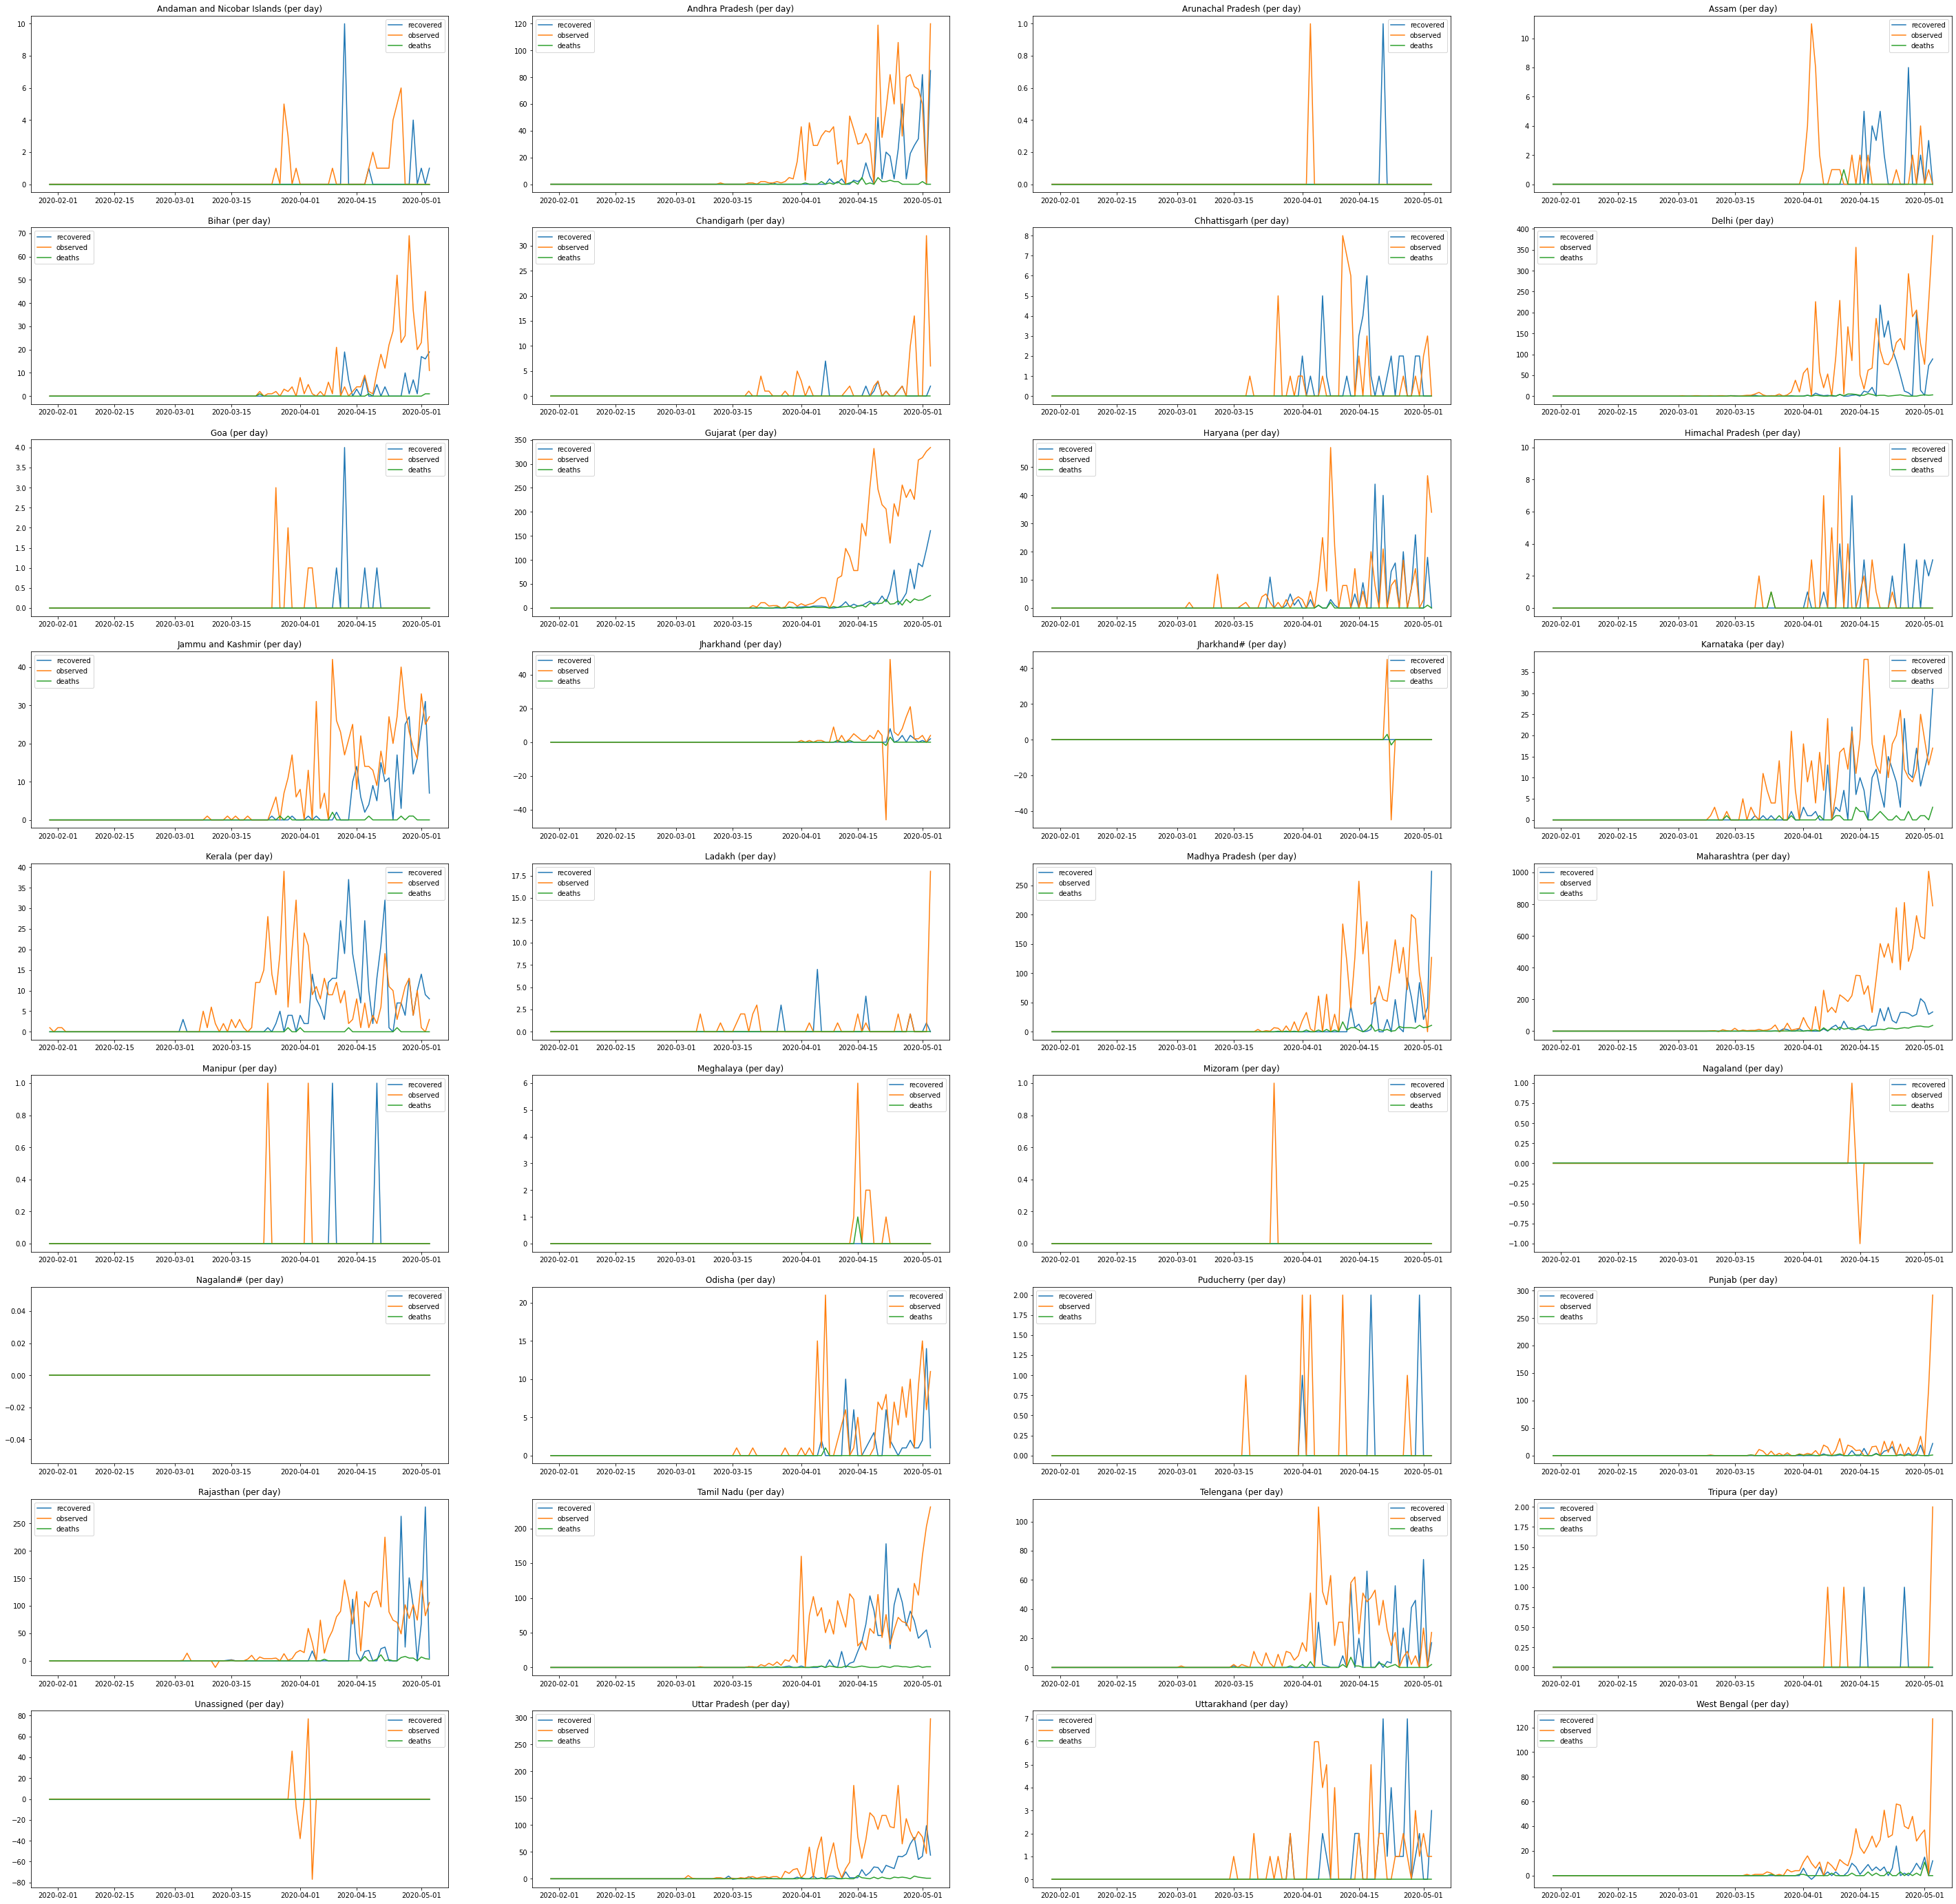

In [55]:
unique_states=df['State/UnionTerritory'].unique()


df_obs=df.groupby(['Date','State/UnionTerritory']).Confirmed.max()
df_obs=df_obs.unstack()
df_obs.fillna(0,inplace=True)
df_obs1=df_obs.diff()                        # Converting from cumulative to per day
df_obs1=df_obs1.T                            
df_obs=df_obs.T
df_obs1['2020-01-30']=df_obs['2020-01-30']
df_obs1=df_obs1.T

df_rec=df.groupby(['Date','State/UnionTerritory']).Cured.max()
df_rec=df_rec.unstack()
df_rec.fillna(0,inplace=True)
df_rec1=df_rec.diff()
df_rec1=df_rec1.T
df_rec=df_rec.T
df_rec1['2020-01-30']=df_rec['2020-01-30']
df_rec1=df_rec1.T

df_d=df.groupby(['Date','State/UnionTerritory']).Deaths.max()
df_d=df_d.unstack()
df_d.fillna(0,inplace=True)
df_d1=df_d.diff()
df_d1=df_d1.T
df_d=df_d.T
df_d1['2020-01-30']=df_d['2020-01-30']
df_d1=df_d1.T

date_list=df_obs1.index

plt.figure(figsize=(50,50))
i=1
plt.subplot(9,4,1)
for state in df_obs1.columns:
    obs=list(df_obs1[state])
    rec=list(df_rec1[state])
    deaths=list(df_d1[state])
    plt.subplot(9,4,i)
    plt.title(state+' (per day)')
    plt.plot(date_list,rec,label='recovered')
    plt.plot(date_list,obs,label='observed')
    plt.plot(date_list,deaths,label='deaths')
    plt.legend()
    i+=1
     
# Note: The range of values in the y-axis varies from plot to plot.
# For example, Andhra Pradesh has y-axis ranging  0-120 while Assam has y-axis ranging 0-10

Negative values in confirmed cases is due to the infecting people moving from one state to another.

For example, an infected bengali person in andaman is immediately sent back to west bengal.

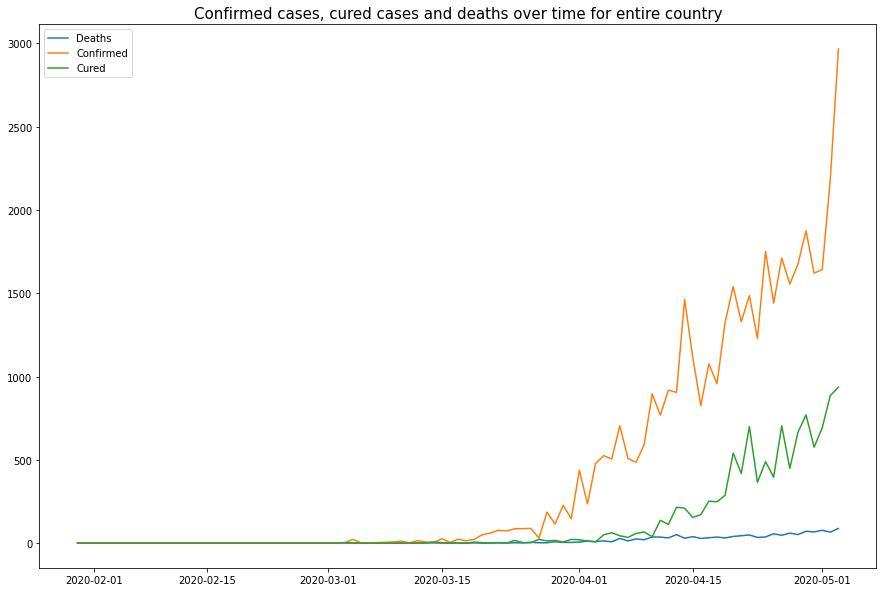

In [56]:
df_india_deaths=df.groupby(['Date','State/UnionTerritory'])['Deaths'].sum()
df_india_deaths=df_india_deaths.unstack()
df_india_deaths.fillna(0,inplace=True)
df_india_deaths1=df_india_deaths.diff()
df_india_deaths1=df_india_deaths1.T
df_india_deaths=df_india_deaths.T
df_india_deaths1['2020-01-30']=df_india_deaths['2020-01-30']

df_india_Confirmed=df.groupby(['Date','State/UnionTerritory'])['Confirmed'].sum()
df_india_Confirmed=df_india_Confirmed.unstack()
df_india_Confirmed.fillna(0,inplace=True)
df_india_Confirmed1=df_india_Confirmed.diff()
df_india_Confirmed1=df_india_Confirmed1.T
df_india_Confirmed=df_india_Confirmed.T
df_india_Confirmed1['2020-01-30']=df_india_Confirmed['2020-01-30']

df_india_Cured=df.groupby(['Date','State/UnionTerritory'])['Cured'].sum()
df_india_Cured=df_india_Cured.unstack()
df_india_Cured.fillna(0,inplace=True)
df_india_Cured1=df_india_Cured.diff()
df_india_Cured1=df_india_Cured1.T
df_india_Cured=df_india_Cured.T
df_india_Cured1['2020-01-30']=df_india_Cured['2020-01-30']


plt.figure(figsize=(15,10))
plt.plot(df_india_deaths1.sum().index,df_india_deaths1.sum().values,label='Deaths')
plt.plot(df_india_Confirmed1.sum().index,df_india_Confirmed1.sum().values,label='Confirmed')
plt.plot(df_india_Cured1.sum().index,df_india_Cured1.sum().values,label='Cured')
plt.title('Confirmed cases, cured cases and deaths over time for entire country',Fontsize=15)
plt.legend()

<h1> Question 3 <h1>

In [0]:
dfpop=Population_india_census2011.copy()

In [0]:
df = Covid_19_india.copy()
rows, cols = df.shape
unique_states = df['State/UnionTerritory'].unique()
latest_no_of_cases = []
latest_date = []
intensity = []
for i in range(unique_states.size):
    latest_no_of_cases.append(0)
    latest_date.append(df.iloc[0,1])
    intensity.append(0)

In [0]:
for i in range(rows):
    j = 0
    for j in range(unique_states.size):
        if unique_states[j] == df.iloc[i,3]:
            break
    if latest_date[j] < df.iloc[i,1]:
        latest_date[j] = df.iloc[i,1]
        latest_no_of_cases[j] = df.iloc[i,8] #- df.iloc[i,6] - df.iloc[i,7]
rowp, colp = Population_india_census2011.shape
for i in range(unique_states.size):
    for j in range(rowp):
        if unique_states[i] == Population_india_census2011.iloc[j,1]:
            intensity[i] = (latest_no_of_cases[i]/float("".join((Population_india_census2011.iloc[j,6].split('/')[0]).split(','))))

Latest Number of Cases state-wise
Kerala:500
Telengana:1063
Delhi:4122
Rajasthan:2772
Uttar Pradesh:2626
Haryana:394
Ladakh:40
Tamil Nadu:2757
Karnataka:606
Maharashtra:12296
Punjab:772
Jammu and Kashmir:666
Andhra Pradesh:1583
Uttarakhand:59
Odisha:160
Puducherry:8
West Bengal:922
Chhattisgarh:43
Chandigarh:94
Gujarat:5055
Himachal Pradesh:40
Madhya Pradesh:2846
Bihar:482
Manipur:2
Mizoram:1
Andaman and Nicobar Islands:33
Goa:7
Unassigned:77
Assam:43
Jharkhand:115
Arunachal Pradesh:1
Tripura:4
Nagaland:0
Meghalaya:12
Nagaland#:0
Jharkhand#:45


Text(0.5, 1.0, 'Latest Number of Cases state-wise')

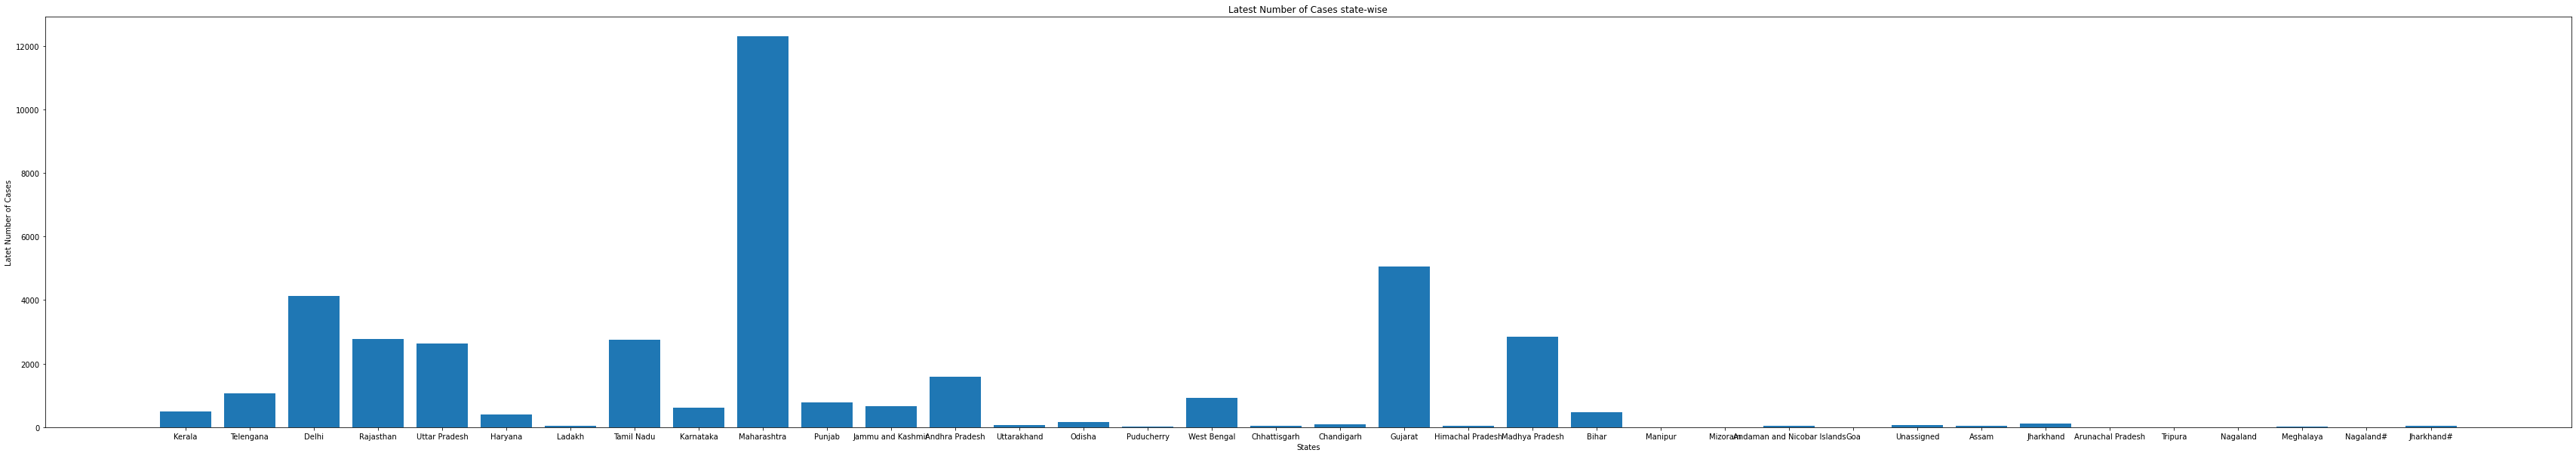

In [61]:
print("Latest Number of Cases state-wise")
for j in range(len(latest_no_of_cases)):
    print(unique_states[j],end=":")
    print(latest_no_of_cases[j])
plt.figure(figsize=(60,10))
plt.bar(unique_states,latest_no_of_cases)
plt.xlabel("States")
plt.ylabel("Latet Number of Cases")
plt.title("Latest Number of Cases state-wise")

Intensity of Virus state-wise
Kerala:0.582
Telengana:3.407
Delhi:0.365
Rajasthan:13.791
Uttar Pradesh:3.171
Haryana:0.688
Ladakh:14.286
Tamil Nadu:4.968
Karnataka:1.9
Maharashtra:33.688
Punjab:1.404
Jammu and Kashmir:6.796
Andhra Pradesh:5.224
Uttarakhand:0.312
Odisha:0.595
Puducherry:0.003
West Bengal:0.896
Chhattisgarh:0.228
Chandigarh:0.01
Gujarat:16.412
Himachal Pradesh:0.325
Madhya Pradesh:12.059
Bihar:0.437
Manipur:0.016
Mizoram:0.019
Andaman and Nicobar Islands:0.717
Goa:0.018
Unassigned:0
Assam:0.108
Jharkhand:0.278
Arunachal Pradesh:0.059
Tripura:0.011
Nagaland:0.0
Meghalaya:0.091
Nagaland#:0
Jharkhand#:0


Text(0.5, 1.0, 'Intensity of Virus state-wise')

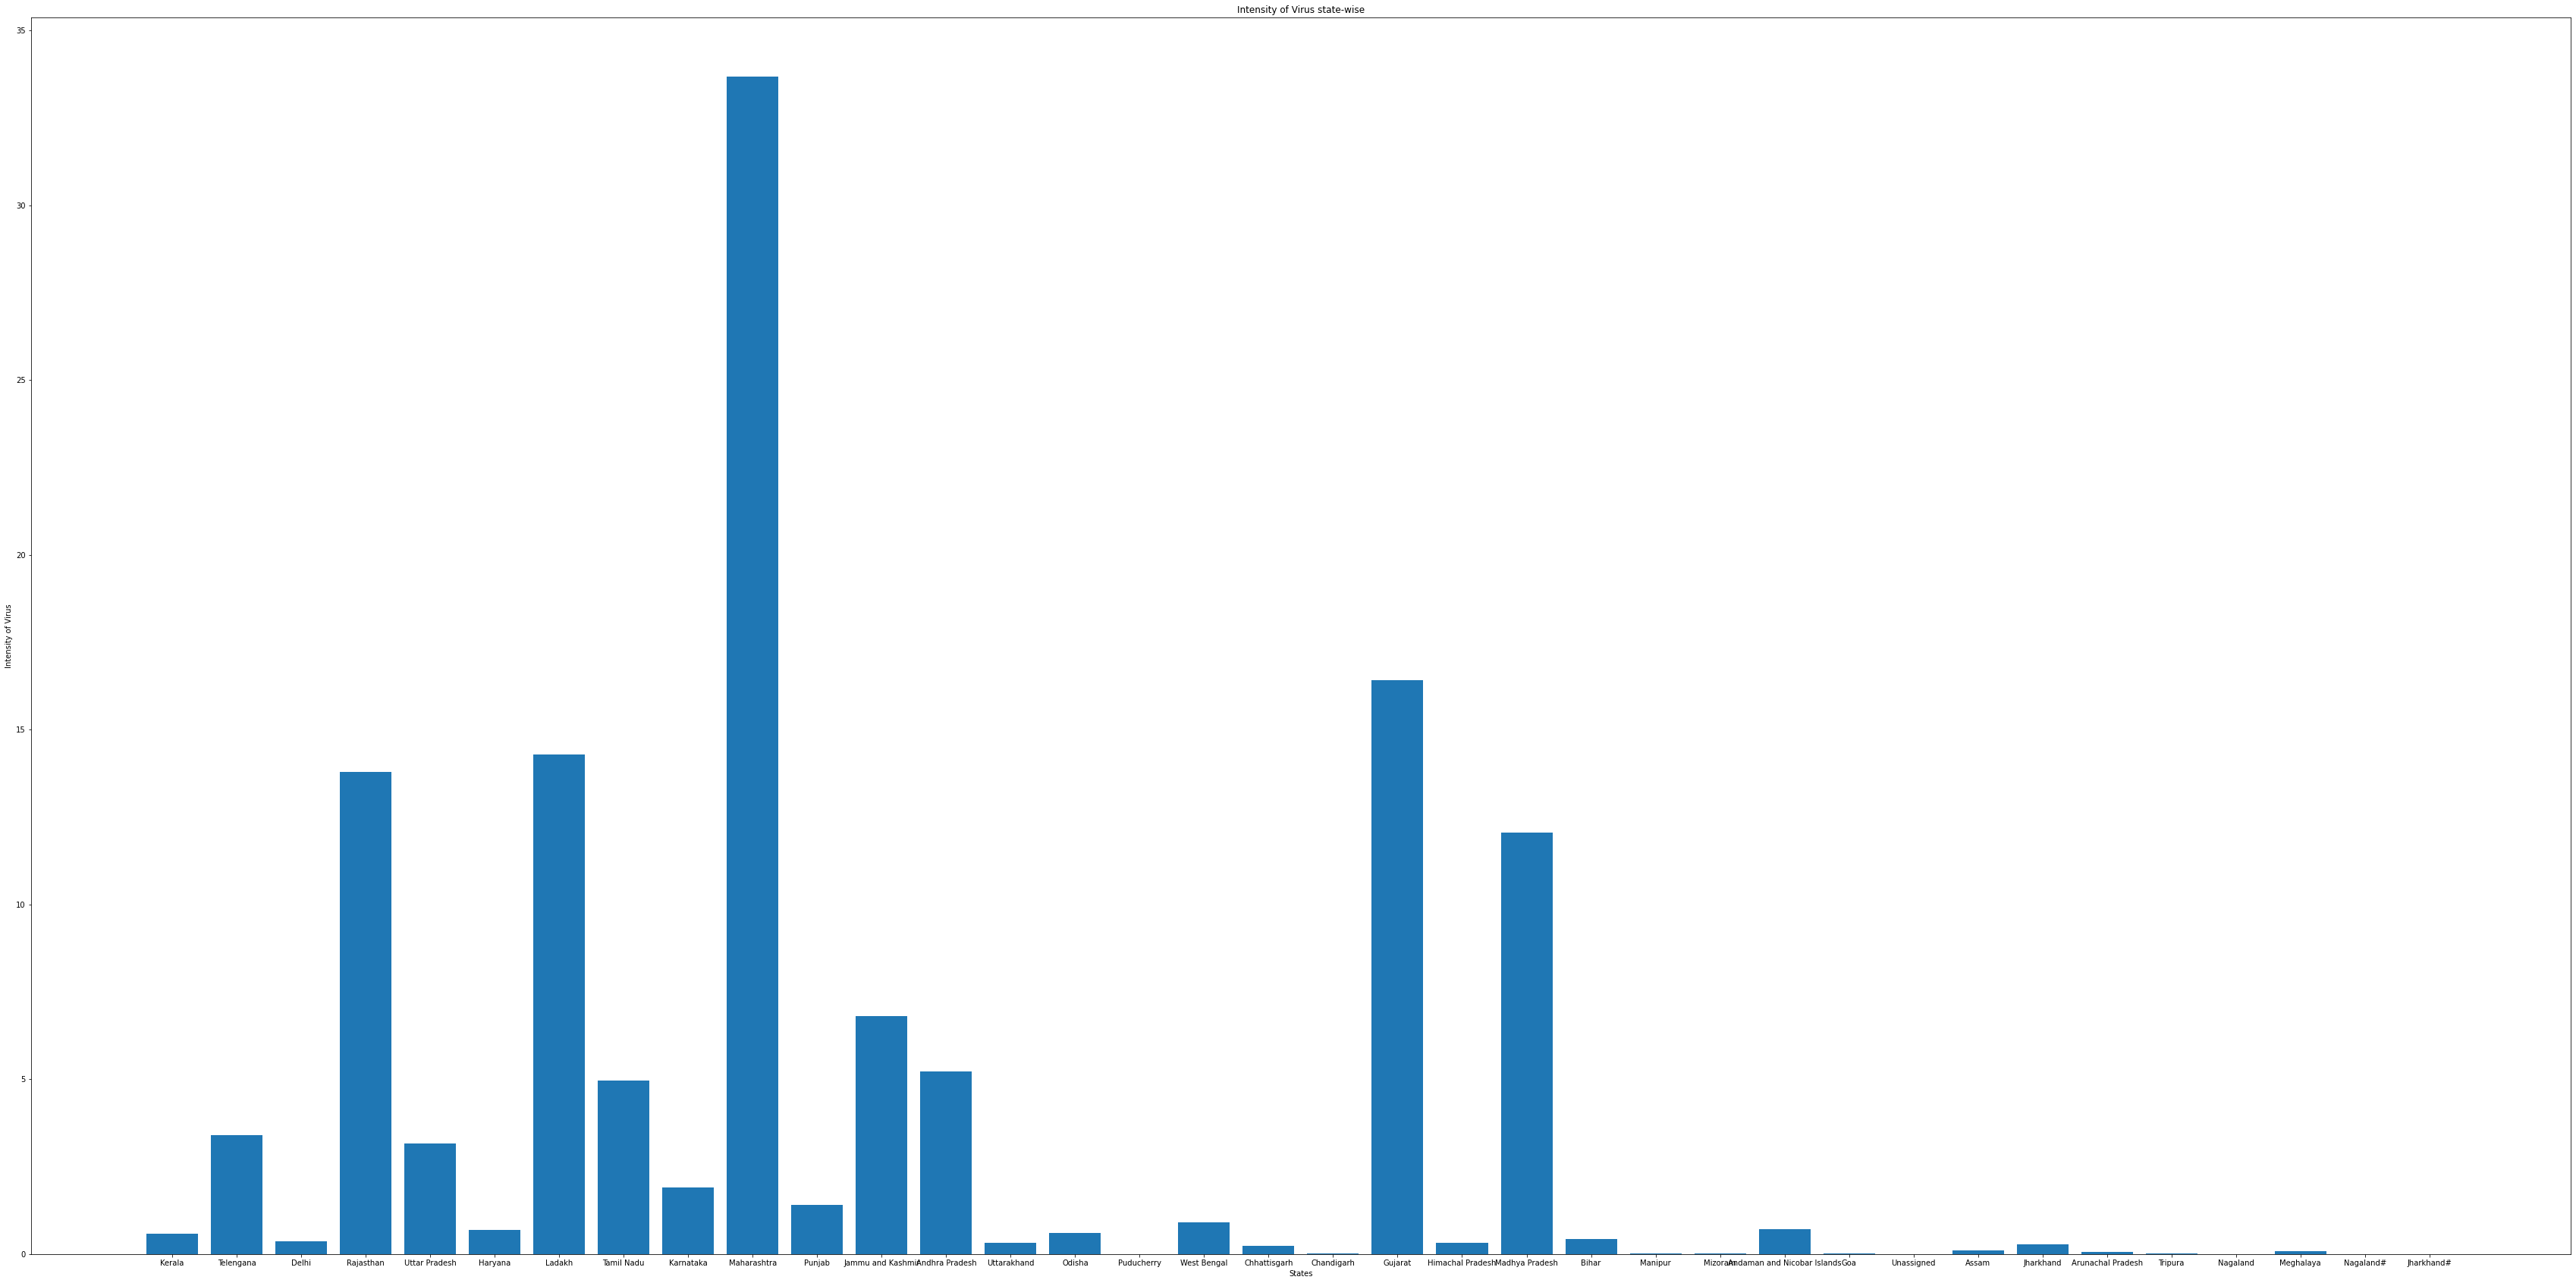

In [62]:
print("Intensity of Virus state-wise")
for j in range(len(latest_no_of_cases)):
    print(unique_states[j],end=":")
    print(round(intensity[j],3))
plt.figure(figsize=(60,30))
plt.bar(unique_states,intensity)
plt.xlabel("States")
plt.ylabel("Intensity of Virus")
plt.title("Intensity of Virus state-wise")

<h1> Question 4 <h1>

In [63]:
df4=IndividualDetails.copy()
df4=df4[df4.current_status=='Hospitalized']


# District=city list
district_equal_city=list(df4['detected_city'].loc[df4.detected_city==df4.detected_district].unique())

# dataframe where detected_city notnull
df41=df4[df4.detected_city.notnull()]

# dataframe where detected_city null and district is in the (district=city) list
df42=df4[(df4.detected_city.isnull()) & (df4.detected_district.isin(district_equal_city))]
# city Null value filled with district name 
df42.detected_city=df42.detected_district

#concatenate two dataframes
df4=pd.concat([df41.copy(),df42.copy()])

# Finding hotspots
df43=df4[df4.diagnosed_date<='2020-04-10']
count_per_city=df43.groupby(['detected_city'])['id'].count()
hotspot_series=count_per_city[count_per_city>=10]
hotspot_series



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


detected_city
Agra                 83
Ahmedabad           188
Ahmednagar           18
Amritsar             11
Aurangabad           16
Bengaluru            21
Bhavnagar            21
Bhilwara             26
Bhopal              116
Bhubaneswar          19
Bodi                 13
Chandigarh           18
Chennai             164
Coimbatore           58
Dehradun             17
Faridabad            28
Gandhinagar          14
Ghaziabad            23
Guntur               30
Gurugram             34
Hyderabad           212
Indore              234
Jaipur              202
Jammu                18
Jhunjhunu            31
Jodhpur              42
Kalyan-Dombivali     34
Karimnagar           18
Kasaragod           157
Kurnool              18
Lucknow              29
Ludhiana             10
Malappuram           16
Mettupalayam         20
Mira-Bhayandar       21
Mohali               11
Mumbai              999
Nagpur               25
Navi Mumbai          32
Nizamuddin area      24
Noida                12
On

<h1>Question 5<h1>

In [0]:
df4=IndividualDetails.copy()



df4['detected_city']=df4['detected_city']+'+'+df4['detected_state']
c1=df4.loc[(df4.diagnosed_date<='2020-03-20') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-03-20'))]
# I am taking into account those who are (diagnosed on or before 20th march and hospitalized) and also those who are (diagnosed on or before 20th march, but recovered/died on any date AFTER 20th march) which means these recovered/deceased people used to be hospitalized on or before 20th march
count_per_city=c1.groupby(['detected_city'])['id'].count()
hs1=count_per_city[count_per_city>=10]
c2=df4.loc[(df4.diagnosed_date<='2020-03-27') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-03-27'))]
count_per_city=c2.groupby(['detected_city'])['id'].count()
hs2=count_per_city[count_per_city>=10]
c3=df4.loc[(df4.diagnosed_date<='2020-04-03') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-04-03'))]
count_per_city=c3.groupby(['detected_city'])['id'].count()
hs3=count_per_city[count_per_city>=10]
c4=df4.loc[(df4.diagnosed_date<='2020-04-10') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-04-10'))]
count_per_city=c4.groupby(['detected_city'])['id'].count()
hs4=count_per_city[count_per_city>=10]

hs1=pd.DataFrame(hs1).reset_index()
hs1=hs1['detected_city'].str.split('+',expand=True)[1].value_counts()
hs2=pd.DataFrame(hs2).reset_index()
hs2=hs2['detected_city'].str.split('+',expand=True)[1].value_counts()
hs3=pd.DataFrame(hs3).reset_index()
hs3=hs3['detected_city'].str.split('+',expand=True)[1].value_counts()
hs4=pd.DataFrame(hs4).reset_index()
hs4=hs4['detected_city'].str.split('+',expand=True)[1].value_counts()

In [65]:
hs3

Maharashtra      7
Tamil Nadu       3
Haryana          1
Uttar Pradesh    1
Gujarat          1
Delhi            1
Kerala           1
Rajasthan        1
Karnataka        1
Telangana        1
Name: 1, dtype: int64

In [0]:
change_1 = pd.Series.subtract(hs2,hs1,fill_value=0).sort_values(ascending=False)
change_2 = pd.Series.subtract(hs3,hs2,fill_value=0).sort_values(ascending=False)
change_3 = pd.Series.subtract(hs4,hs3,fill_value=0).sort_values(ascending=False)

Week one changes

In [67]:
change_1

Maharashtra    2.0
Rajasthan      1.0
Kerala         1.0
Karnataka      1.0
Gujarat        1.0
Telangana      0.0
Haryana        0.0
Name: 1, dtype: float64

Week two changes

In [68]:
change_2

Maharashtra      4.0
Tamil Nadu       3.0
Uttar Pradesh    1.0
Delhi            1.0
Telangana        0.0
Rajasthan        0.0
Kerala           0.0
Karnataka        0.0
Haryana          0.0
Gujarat          0.0
Name: 1, dtype: float64

Week three changes

In [69]:
change_3

Maharashtra       4.0
Andhra Pradesh    3.0
Rajasthan         1.0
Punjab            1.0
Odisha            1.0
Uttar Pradesh     0.0
Telangana         0.0
Tamil Nadu        0.0
Kerala            0.0
Karnataka         0.0
Haryana           0.0
Gujarat           0.0
Delhi             0.0
Name: 1, dtype: float64

States and their corresponding number of hotspots as on 20th march, 27th march, 3rd april and 10th april are as follows

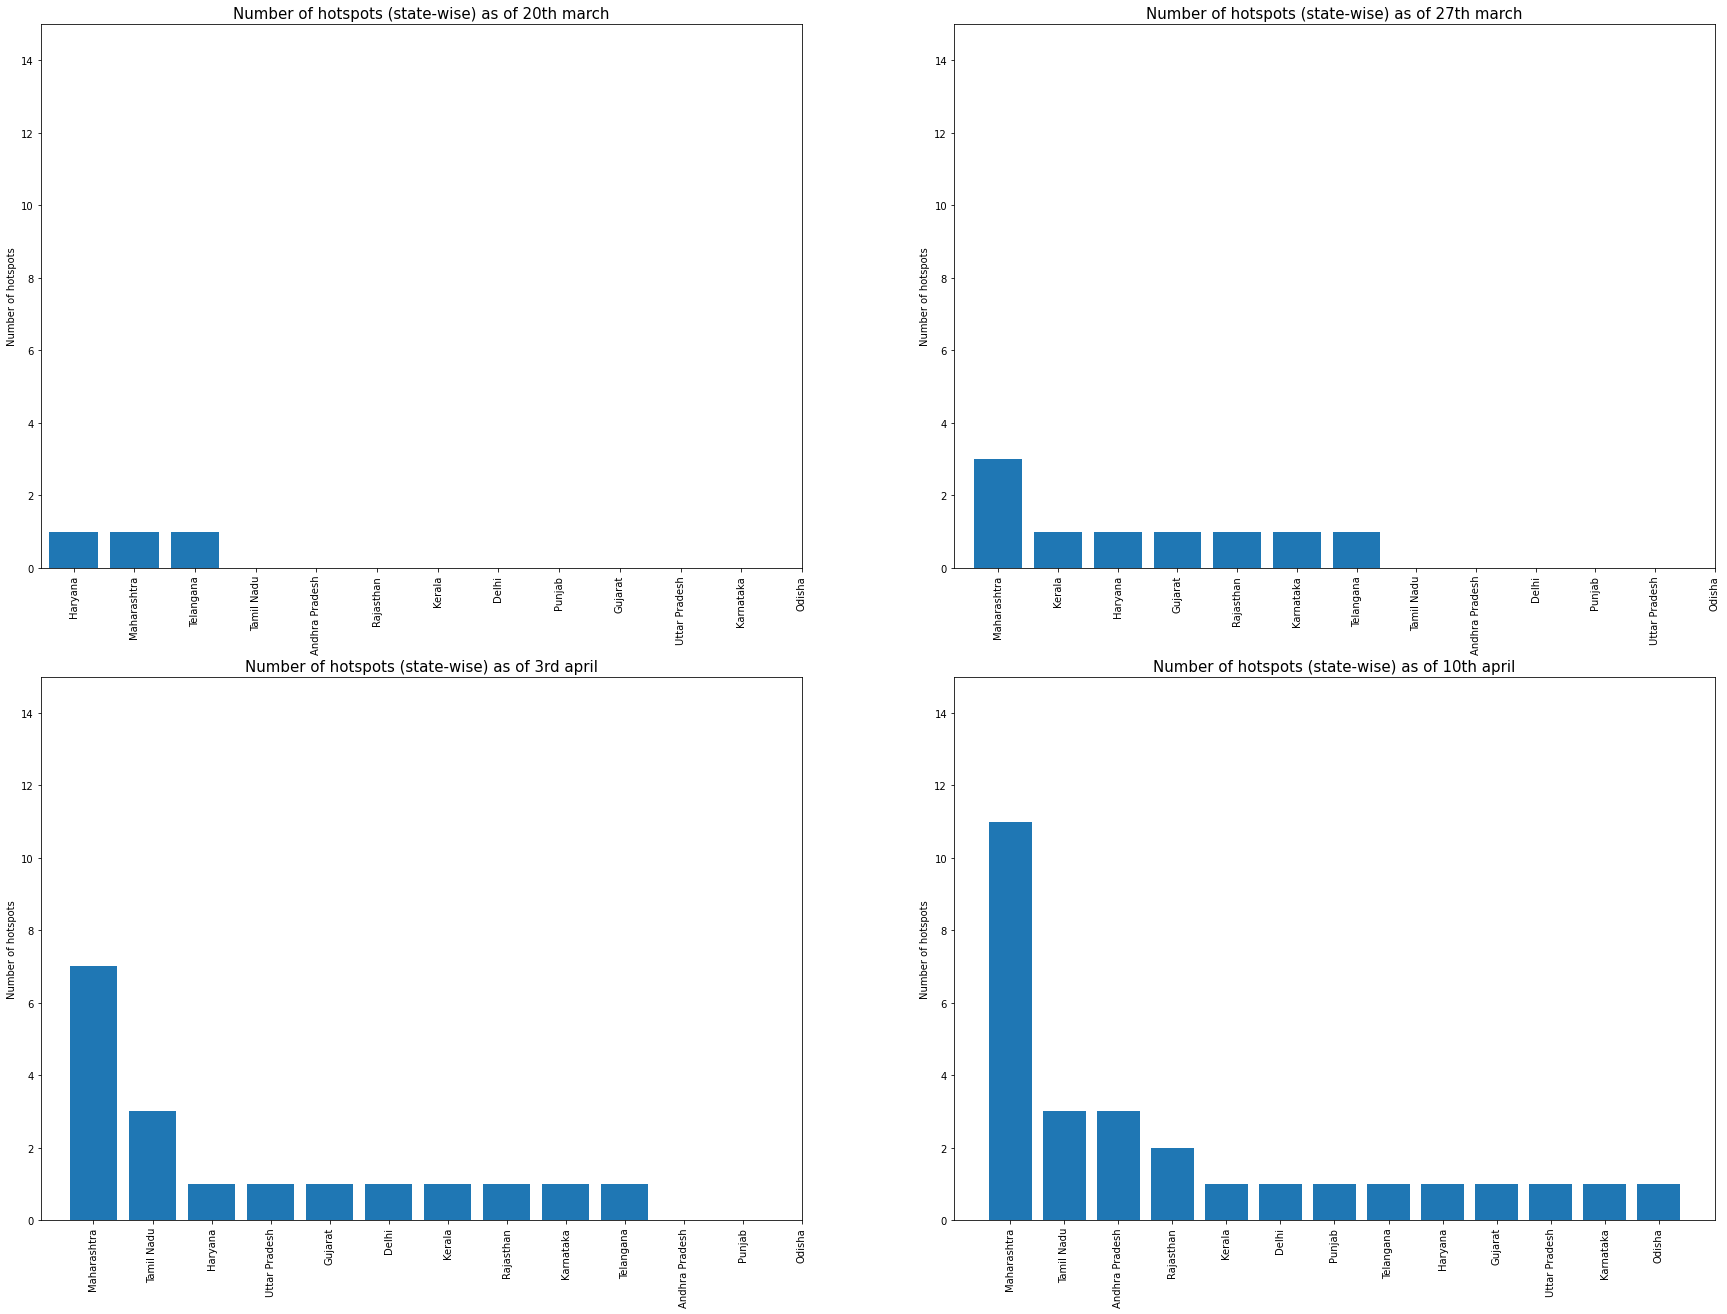

In [70]:
plt.figure(figsize=(30,22))
j=1
dlist=['20th march','27th march','3rd april','10th april']
for i in (hs1,hs2,hs3,hs4):
  plt.subplot(2,2,j)
  plt.bar(i.index,i.values)
  plt.xticks(hs4.index,rotation=90)
  plt.ylabel('Number of hotspots')
  plt.ylim(0,15)
  plt.title('Number of hotspots (state-wise) as of {}'.format(dlist[j-1]),fontsize=15)
  j+=1

From 20th march to 27th march Maharashtra has the maximum increase in the number of hotspots. Increase by 2 from 1 to 3. 

From 

In [71]:
IndividualDetails.columns

Index(['id', 'government_id', 'diagnosed_date', 'age', 'gender',
       'detected_city', 'detected_district', 'detected_state', 'nationality',
       'current_status', 'status_change_date', 'notes'],
      dtype='object')

In [72]:
IndividualDetails['nationality'].unique()

array(['India', 'Italy', 'Canada', 'United Kingdom', 'Phillipines',
       'Indonesia', nan, 'Thailand', 'United States of America', 'Tibet',
       'Malaysia', 'Myanmar'], dtype=object)

In [73]:
IndividualDetails['notes'].unique()

array(['Travelled from Wuhan', 'Travelled from Austria, Italy',
       'Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad',
       'Travelled from Italy', 'Travelled from Italy, Wife of P6',
       'Family members of P4',
       'Accompanied the Italian tourists, Nationality: Indian',
       'Travelled from Italy PayTm Emp, ', 'Travelled from Iran',
       'Travelled from Thailand and Malaysia', nan,
       'Travelled from Oman to Chennai Airport on 28.02.2020',
       'Travelled from Italy on 29/02/2020 through Doha',
       'Relative and neighbour of P35-P37',
       'Relative  and neighbour of P35-P37', 'No travel history',
       'Travelled from US via London, Mindtree Employee',
       'Travelled from Italy on 07/03/2020 (Parents in isolation)',
       'Travelled from Dubai on 1 March, Husband of P45',
       'Travelled from Dubai on 1 March, Wife of P44',
       'Factory Manager contact with businessman from Italy',
       'Was in 

<ol>
    <li>Travelled from</li>
    <li>Relative of/contact with/close contact</li>
    <li>Details Awaited/No travel history</li>
</ol>

In [74]:
df_6 = IndividualDetails.loc[(IndividualDetails.diagnosed_date<='2020-04-10')].copy()
se = {"Wuhan"}
for i in range(df_6.shape[0]):
    word_list = str(df_6['notes'][i]).split()
    if word_list[0] == 'Travelled':
        if word_list[1] == 'from':
            se.add(word_list[2])
print(se)
print("Wuhan" in se)

{'Turkey,', 'Paris', 'Abhudhabi', 'Mumbai', 'Delhi,', 'the', 'Germany', 'Delhi', 'Abu', 'London', 'Dubai', 'Denmark', 'Ireland', 'Philippines,', 'Qatar,Pregnant', 'Kolkata', 'France', 'Netherlands', 'Sharjah', 'Thiruvananthapuram,', 'Netherlands;', 'UK.', 'Bangladesh', 'Edenburg,', 'Asansol', 'Sri', 'Austria,', 'UAE', 'Birmingham,UK', 'Qatar', 'Rajasthan', 'Stockholm', 'Egypt,', 'Spain', 'Oman', 'Bahrain', 'Dublin,', 'USA,', 'London,', 'Finland', 'Wuhan', 'Phuket', 'Spain;', 'Saudi', 'Italy,', 'West', 'Indonesia', 'US,', 'Colombo,', 'Istanbul,', 'Singapore', 'Mecca,', 'Switzerland', 'Mexico', 'Dubai.', 'Mecca', 'California', 'Thailand', 'Ongle,', 'Iran', 'Bengaluru;', 'Greece', 'Japan,', 'Italy', 'United', 'Trinidad', 'Dubai;', 'Dubai,', 'Trivandrum', 'Australia', 'UK,', 'France,', 'Sharjah,', 'US', 'Baharain', 'Philippines', 'Brazil', 'New', 'Canada', 'Japan.', 'Scotland', 'USA', 'Bahamas', 'Andaman', 'Manipur', 'to', 'Japan', 'Sweden', 'Middle', 'Qatar,', 'Congo', 'Washington,', 'Ris

In [75]:
df_6.shape

(7599, 12)

In [0]:
for place in ['Delhi','Andaman','Thiruvananthapuram,','Rajasthan,','WB']:
    se.discard(place)

In [77]:
places = {x.lower() for x in se}
for w in ['travelled','travel']:
    places.add(w)
print(places)

{'california', 'spain;', 'mecca,', 'trinidad', 'new', 'the', 'japan,', 'asansol', 'mecca', 'uk,', 'thailand', 'qatar,pregnant', 'travelled', 'indonesia', 'russia', 'spain,', 'us', 'us,', 'ongle,', 'spain', 'italy', 'australia', 'saudi', 'delhi,', 'netherlands', 'italy,', 'uk', 'qatar,', 'austria,', 'paris', 'abu', 'congo', 'finland', 'dubai,', 'sharjah', 'philippines', 'istanbul,', 'turkey,', 'travel', 'ireland', 'edenburg,', 'denmark', 'switzerland', 'rishikesh', 'dubai', 'singapore', 'colombo,', 'mexico', 'france,', 'france', 'uae', 'scotland', 'usa,', 'kolkata', 'sharjah,', 'wuhan', 'turkey', 'bangladesh', 'stockholm', 'london', 'uk.', 'oman', 'japan.', 'manipur', 'greece', 'abhudhabi', 'dubai.', 'canada', 'bahamas', 'brazil', 'malaysia', 'iran', 'netherlands;', 'bahrain', 'egypt,', 'london,', 'japan', 'baharain', 'bengaluru;', 'phuket', 'middle', 'dubai;', 'dublin,', 'qatar', 'iran,', 'sweden', 'united', 'mumbai', 'germany', 'to', 'birmingham,uk', 'philippines,', 'west', 'sweden;',

Retaining that 'New' because it referred to New York and New Zealand and not some Indian place like New Delhi

In [0]:
contacts = {"Wife"}
for i in range(df_6.shape[0]):
    word_list = str(df_6['notes'][i]).split()
    j = 0
    for word in word_list:
        if word == 'of':
            if j != 0:
                contacts.add(word_list[j-1])
        j += 1

In [79]:
contacts2 = {"friend"}
for i in range(df_6.shape[0]):
    word_list = str(df_6['notes'][i]).split()
    j = 0
    for word in word_list:
        if word == 'with':
            if j != 0:
                contacts.add(word_list[j+1])
        j += 1
contacts2 = {x.lower() for x in contacts}
print(contacts2)

{'friend', 'no', 'residents', 'relative', 'family', 'employee', 'group', 'p681', 'healthcare', 'friends', 'p285', 'spouse', 'participation', 'grandmother', 'gujarat', 'two', 'son', 'doctor', 'contact', 'cousin', 'staff', 'or-p41', 'p22-p27', 'sister', '1st', 'businessman', 'tenant', 'law', 'p124', 'travel', 'member', 'brother-in-law', 'guajrat', 'p632', 'thai', 'date', 'one', 'members', 'hospital', 'a', 'institute', 'dubai', 'history', 'aunt', 'at', 'cab', 'contacts', 'grandchildren', 'p78', 'ts-p26', 'resident', 'as', 'son(p285),', 'native', 'oman', 'source', 'some', 'p44', 'jk', 'case', '17', 'uncle', 'neighbour', 'part', 'p531', 'p117', 'daughter', 'p713', 'positive', 'ts-p34', 'relatives', 'p', 'complaint', 'p316', 'cook', 'tn-p5', 'wife', 'p52', 'previous', 'roommate', 'ka-p109', 'husband', 'ts-p25', 'worker)', 'mother', 'brother', 'p182', 'mother&son', 'worker', 'father', 'indonesian', 'his', 'cases', 'mention', 'passenger', 'another', 'negative', 'covid'}


In [80]:
for word in ['Source','Both','at','as', 'resident','complaint','case']:
    contacts.discard(word)
contacts.update(['contact','Contact','Relative','member','close','with','family','members','related','hospital','clinic','doctor','nurse','patient'])
contacts = {x.lower() for x in contacts}
contacts.update([x for x in contacts2])
print(contacts)

{'friend', 'no', 'residents', 'relative', 'family', 'employee', 'group', 'p681', 'healthcare', 'friends', 'p285', 'spouse', 'participation', 'grandmother', 'gujarat', 'two', 'related', 'son', 'doctor', 'contact', 'cousin', 'staff', 'or-p41', 'p22-p27', 'sister', '1st', 'businessman', 'tenant', 'law', 'p124', 'travel', 'member', 'patient', 'brother-in-law', 'guajrat', 'p632', 'thai', 'date', 'one', 'members', 'hospital', 'a', 'institute', 'clinic', 'dubai', 'history', 'aunt', 'at', 'cab', 'with', 'contacts', 'grandchildren', 'p78', 'ts-p26', 'resident', 'as', 'son(p285),', 'native', 'oman', 'some', 'source', 'p44', 'jk', '17', 'case', 'uncle', 'neighbour', 'part', 'p531', 'p117', 'close', 'daughter', 'p713', 'positive', 'ts-p34', 'relatives', 'p', 'complaint', 'p316', 'cook', 'tn-p5', 'wife', 'p52', 'previous', 'roommate', 'ka-p109', 'husband', 'ts-p25', 'worker)', 'mother', 'brother', 'p182', 'mother&son', 'worker', 'father', 'indonesian', 'his', 'cases', 'mention', 'passenger', 'anoth

In [0]:
rows,cols = df_6.shape
count1 = 0
count2 = 0
category = np.zeros(shape=(rows,1),dtype='int64')

In [82]:
for i in range(rows):
    chk = 1
    words = str(df_6['notes'][i]).split()
    word_list = [w.lower() for w in words]
    #print(word_list)
    if chk:
        for word in contacts:
            if word in word_list:
                chk=0
                category[i] = 2
                count2 += 1
                break
    if chk:
        for word in places:
            if word in word_list:
                category[i] = 1
                chk = 0
                count1 += 1
                break
        for word in word_list:
            if word[0] == 'p':
                if len(word) > 1:
                    s = word[1]
                    if s.isdigit() :
                        count2 += 1
                        category[i] = 2
                        chk = 0
                        break
    if chk:
        category[i] = 3
print(count1,count2,len(category)-count1-count2)

1233 980 5386


In [0]:
df_6['category1'] = np.zeros(shape=(rows,1))
df_6['category2'] = np.zeros(shape=(rows,1))
df_6['category3'] = np.zeros(shape=(rows,1))

In [84]:
df_6['category3'].sum() + df_6['category1'].sum() + df_6['category2'].sum()

0.0

In [0]:
cat = []
for i in range(len(category)):
    cat.append(int(category[i]))

In [86]:
for i in range(rows):
    df_6[str('category'+str(cat[i]))][i] = 1
    if (i+1)%1000 == 0:
        print(i)
df_6.groupby('detected_state').sum()

999
1999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2999
3999
4999
5999
6999


,id,category1,category2,category3
detected_state,,,,
Andaman and Nicobar Islands,14331,5.0,3.0,3.0
Andhra Pradesh,1317798,69.0,18.0,294.0
Arunachal Pradesh,2093,1.0,0.0,0.0
Assam,77579,23.0,1.0,5.0
Bihar,217976,13.0,31.0,16.0
Chandigarh,25298,5.0,12.0,2.0
Chhattisgarh,60390,5.0,2.0,11.0
Delhi,3749805,48.0,17.0,838.0
Goa,9747,2.0,5.0,0.0


In [87]:
new_df = df_6.groupby('detected_state').sum().copy()
new_df['cases'] = new_df['category1'] + new_df['category2'] + new_df['category3']
new_df.sort_values(by ='cases' , ascending=False, inplace = True)
new_df.head()

,id,category1,category2,category3,cases
detected_state,,,,,
Maharashtra,6609100,40.0,79.0,1455.0,1574.0
Tamil Nadu,3356251,534.0,77.0,300.0,911.0
Delhi,3749805,48.0,17.0,838.0,903.0
Rajasthan,2405375,43.0,110.0,408.0,561.0
Telangana,1689293,35.0,26.0,426.0,487.0


In [88]:
#converting to percentages
for w in ['category1','category2','category3']:
    new_df[w] = new_df[w]/new_df['cases']*100
new_df.head()

,id,category1,category2,category3,cases
detected_state,,,,,
Maharashtra,6609100,2.541296,5.019060,92.439644,1574.0
Tamil Nadu,3356251,58.616905,8.452250,32.930845,911.0
Delhi,3749805,5.315615,1.882614,92.801772,903.0
Rajasthan,2405375,7.664884,19.607843,72.727273,561.0
Telangana,1689293,7.186858,5.338809,87.474333,487.0


In [89]:
dfplot = new_df.head()
dfplot = pd.DataFrame(dfplot).reset_index()
dfplot.drop(columns = 'id',inplace=True)
dfplot.head()

,detected_state,category1,category2,category3,cases
0,Maharashtra,2.541296,5.019060,92.439644,1574.0
1,Tamil Nadu,58.616905,8.452250,32.930845,911.0
2,Delhi,5.315615,1.882614,92.801772,903.0
3,Rajasthan,7.664884,19.607843,72.727273,561.0
4,Telangana,7.186858,5.338809,87.474333,487.0


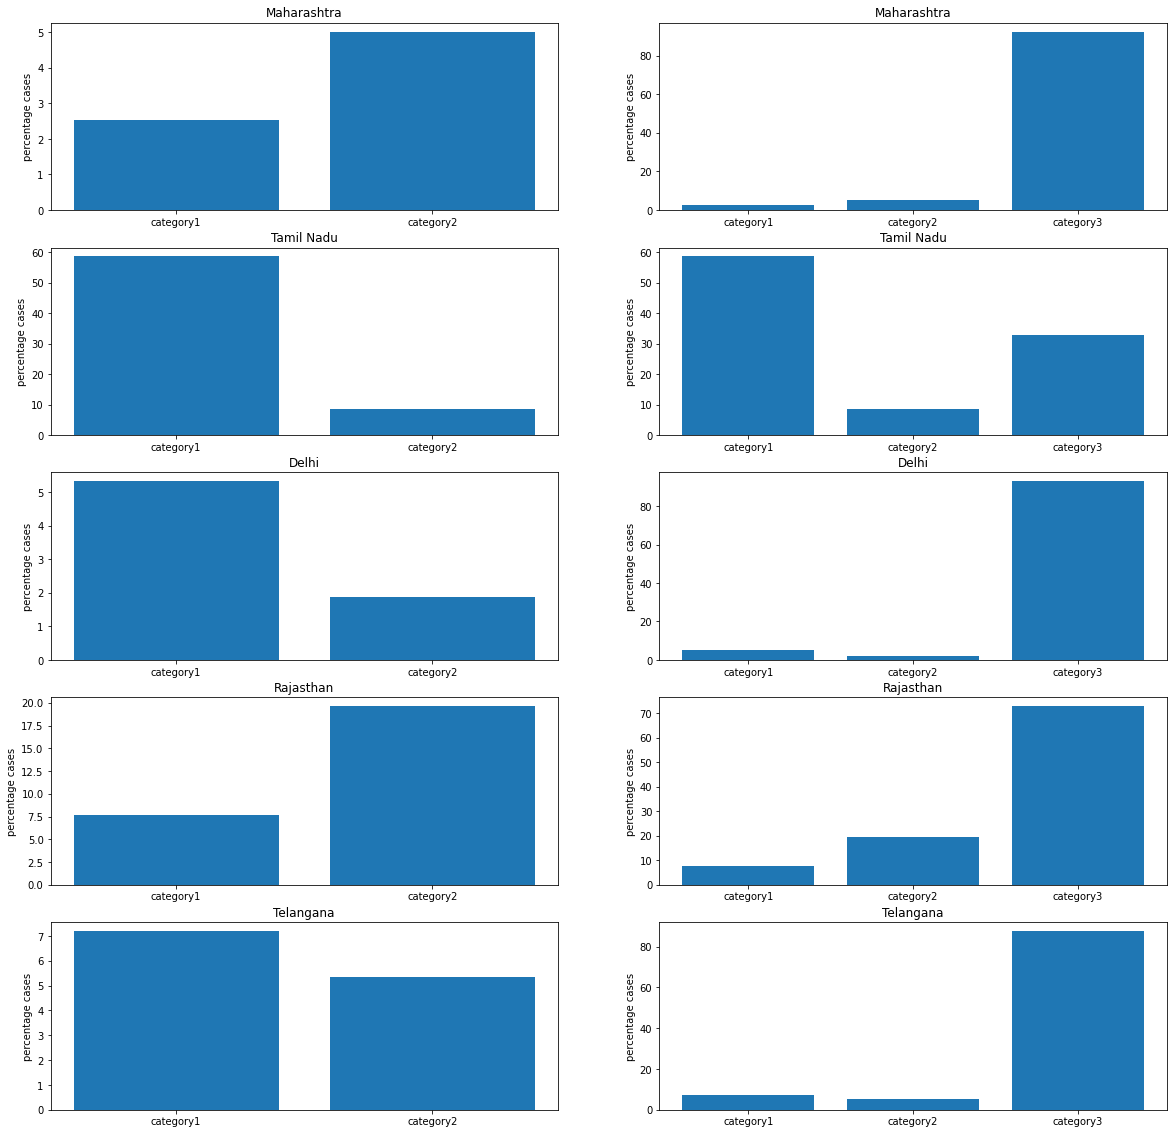

In [90]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,2,i*2+1)
    plt.title(dfplot.iloc[i,0])
    plt.ylabel('percentage cases')
    plt.bar(x=['category1','category2'],height=[dfplot.iloc[i,1],dfplot.iloc[i,2]])
    plt.subplot(5,2,i*2+2)
    plt.title(dfplot.iloc[i,0])
    plt.ylabel('percentage cases')
    plt.bar(x=['category1','category2','category3'],height=[dfplot.iloc[i,1],dfplot.iloc[i,2],dfplot.iloc[i,3]])

# Question 7

Assuming sufficient number of labs were present at 10th of april.

In [91]:
ICMRTestingDetails = pd.read_csv('ICMRTestingDetails.csv')
ICMRTestingDetails.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,5900.0,78.0
1,2,18/03/20 18:00,13125.0,12235.0,150.0
2,3,19/03/20 18:00,14175.0,13285.0,182.0
3,4,20/03/20 18:00,15404.0,14514.0,236.0
4,5,21/03/20 18:00,16911.0,16021.0,315.0


In [0]:
df7 = ICMRTestingDetails.copy()
df7.drop(columns=['TotalIndividualsTested'], inplace=True)#BEcause it has lot of null values

In [93]:
df7.dropna(inplace = True)
df7

,SNo,DateTime,TotalSamplesTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,78.0
1,2,18/03/20 18:00,13125.0,150.0
2,3,19/03/20 18:00,14175.0,182.0
3,4,20/03/20 18:00,15404.0,236.0
4,5,21/03/20 18:00,16911.0,315.0
5,6,22/03/20 18:00,18127.0,396.0
6,7,23/03/20 20:00,20707.0,471.0
7,8,24/03/20 20:00,22694.0,536.0
8,9,25/03/20 20:00,25144.0,581.0
10,11,27/03/20 9:00,27688.0,691.0


In [94]:
#Dropping extra data(data after 10th april which wasn't available in the original dataset)
df7 = df7.iloc[:20,:]
df7

,SNo,DateTime,TotalSamplesTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,78.0
1,2,18/03/20 18:00,13125.0,150.0
2,3,19/03/20 18:00,14175.0,182.0
3,4,20/03/20 18:00,15404.0,236.0
4,5,21/03/20 18:00,16911.0,315.0
5,6,22/03/20 18:00,18127.0,396.0
6,7,23/03/20 20:00,20707.0,471.0
7,8,24/03/20 20:00,22694.0,536.0
8,9,25/03/20 20:00,25144.0,581.0
10,11,27/03/20 9:00,27688.0,691.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


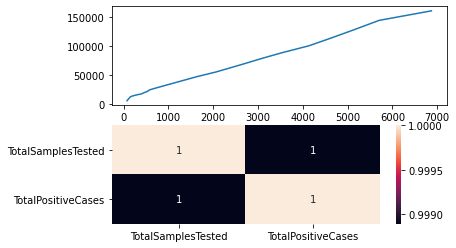

In [95]:
plt.ylabel('Number of Tests')
plt.xlabel('Number of Cases')
plt.subplot(2,1,1)
plt.plot(df7['TotalPositiveCases'],df7['TotalSamplesTested'])
import seaborn
correlation_matrix = df7.drop(columns=['SNo'],inplace=False).corr()
plt.subplot(2,1,2)
seaborn.heatmap(correlation_matrix, annot = True)

We have a <b>strong</b> Linear Correlation between the features. So we can build a Linear Regression model to predict the number of tests given the number of cases. The changes in number of cases can be assumed to be as given in the question.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model1 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df7['TotalPositiveCases'],df7['TotalSamplesTested'],test_size = 0.3)
model1.fit(np.asarray(X_train).reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#R^2 score of the model
model1.score(np.asarray(X_test).reshape(-1, 1),y_test)

0.9960143438454028

In [98]:
df_cases = Covid_19_india.copy()
conf_10=df_cases['Confirmed'].loc[df_cases.Date=='2020-04-10'].sum()
conf_10

6761

In [0]:
conf_20 = np.zeros(shape=(10,1))
for i in range(10):
    conf_20[i] = conf_10*(1.1**(i+1))
no_of_tests_predicted = model1.predict(conf_20.reshape(-1,1))

In [100]:
no_of_tests_predicted = no_of_tests_predicted.round()
no_of_tests_predicted

array([178065., 194843., 213298., 233598., 255929., 280493., 307513.,
       337235., 369929., 405893.])

Since we don't have the data of total number of labs, we will assume that all the labs were used in full capacity on the <b>tenth of April</b>.

In [101]:
no_labs_base =  161330.0/100
extra_labs = np.zeros(shape=(10,1),dtype='int64')
for i in range(10):
    extra_labs[i] = (no_of_tests_predicted[i])/100-no_labs_base
extra_labs

array([[ 167],
       [ 335],
       [ 519],
       [ 722],
       [ 945],
       [1191],
       [1461],
       [1759],
       [2085],
       [2445]])

<h1> Question 8 <h1>

Text(0.5, 1.0, 'Total confirmed cases in India (cumulative)')

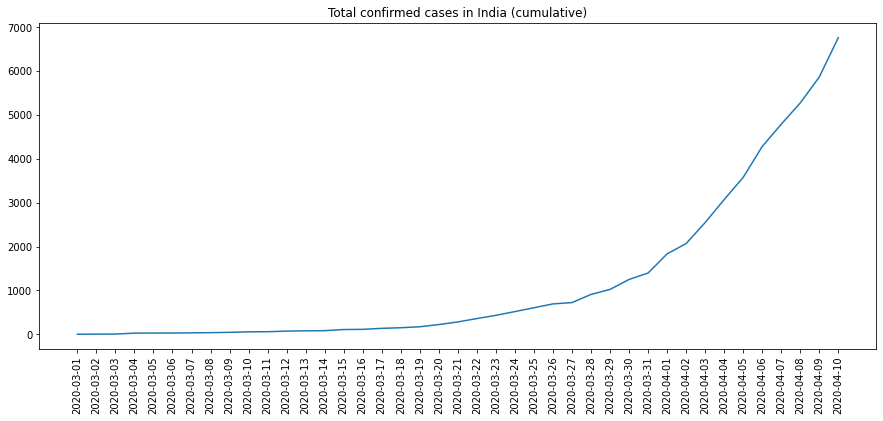

In [102]:
df9=df.loc[(df.Date>='2020-03-01') & (df.Date<='2020-04-10')]
df9=df9.groupby(['Date'])['Confirmed'].sum()

#plotting
plt.figure(figsize=(15,6))
plt.plot(df9.index,df9.values)
plt.xticks(df9.index,rotation=90)
plt.title('Total confirmed cases in India (cumulative)')



We haven't come to the phase of flattening the curve yet. The infected cases are increasing and the rate of increase also seems to be increasing


# Question 10

Let's make a line plot of confirmed cases per day to see how effective the lockdown has been. 

The plot is **not** cumulative as cumulative confirmed cases per day will **not** give an usefull idea on the effectiveness of lockdown.

Text(0.5, 1.0, 'Confirmed cases per day (non-cumulative)')

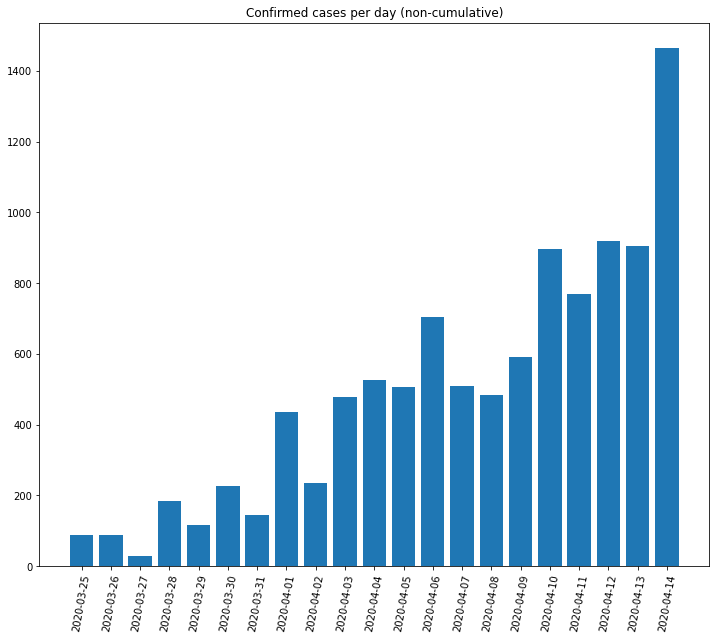

In [103]:
df10=df.loc[(df.Date>='2020-03-24') & (df.Date<='2020-04-14')]   # Lower limit 24th march instead of  25th march for the purpose of subtracting
df10=df10.groupby('Date')['Confirmed'].sum() 
df10=df10.diff()                                                 # Culumulative to per day
df10.dropna(inplace=True)                                        # Removing value of 24th march 
df10
plt.figure(figsize=(12,10))
plt.bar(df10.index,df10.values)
plt.xticks(df10.index,rotation=80)
plt.title('Confirmed cases per day (non-cumulative)')

We have verified the validity of our above graph with the link given below.

 https://www.bloombergquint.com/coronavirus-outbreak/coronavirus-updates-total-cases-in-india-rise-death-toll-cured-lockdwon-extension-health-ministry-states-measures-icmr?share=eyJjYXJkSWQiOiI4Mzk2OWM2OS00ODc3LTQ4ZjItOGMwOS1kMzJhNjM3MmM2N2QiLCJlbGVtZW50Ijp7ImlkIjoiMWNhMzc0MGEtZTY2Zi00NDAxLWE0MTctMmZkZTlmNTYyOWFhIn19

Note: Only the **dataset given** is used. The above link is for the purpose verification alone.

From the graph above we can conclude that the 21 day lockdown from 25th march to 14th april is only **partially successful** as by the end of lockdown i.e.14th april, the new infected cases have soared up (probably because people are not following it strictly).

We do see some relative dips in new infected cases on dates like 8th april and 11th april indicating that lockdown is indeed working.

**Suggestion/Inference:**

The lockdown **needs** to be (infact will be) extended beyond 14th april and more strict measures should be taken during the extended lockdown.  



